# Exploratory Data Analysis

In [1]:
import os
import sys
import pandas as pd 
import datetime 
import math 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab

%load_ext autoreload
%autoreload 2
%matplotlib inline 

# Setting up directories
ROOT_DIR = os.path.join(os.getcwd(), '..')
# ROOT_DIR =os.getcwd()

SRC_DIR = os.path.join(os.getcwd(), '..', 'src')
DATA_DIR = os.path.join(ROOT_DIR, "data")
RAW_DATA_DIR = os.path.join(DATA_DIR, "01_raw")

sys.path.append(ROOT_DIR)
sys.path.append(SRC_DIR)
os.chdir(ROOT_DIR)

### Load Data



This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.


In [2]:
cust_seg_df = pd.read_excel(os.path.join(RAW_DATA_DIR, "Online Retail.xlsx"))

### Attribute detail

- **InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction.
- **StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- **Description:** Product (item) name. Nominal.
- **Quantity:** The quantities of each product (item) per transaction. Numeric.
- **InvoiceDate:** Invice Date and time. Numeric, the day and time when each transaction was generated.
- **UnitPrice:** Unit price. Numeric, Product price per unit in sterling.
- **CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- **Country:** Country name. Nominal, the name of the country where each customer resides.

### Sneak peak the data

In [3]:
cust_seg_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
cust_seg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
cust_seg_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Negative values for quatity and unit-price indicates that there are return transcations in data-set.

### Missing values

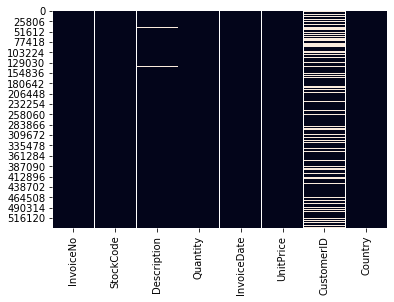

In [6]:
sns.heatmap(cust_seg_df.isnull(), cbar=False)

### Percentage of missing values

In [7]:
print('Missing CustomerIDs % : ' + str( np.mean(cust_seg_df['CustomerID'].isnull()) * 100))
print('Missing Descriptions % : ' + str( np.mean(cust_seg_df['Description'].isnull()) * 100))

Missing CustomerIDs % : 24.926694334288598
Missing Descriptions % : 0.2683107311375157


### Probability distribution funcions

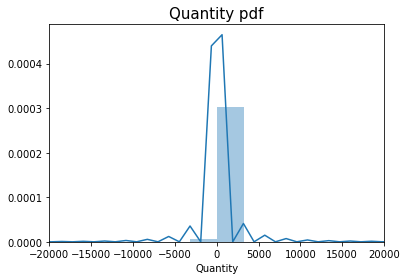

In [26]:
sns.distplot(cust_seg_df['Quantity'])
plt.title('Quantity pdf', size=15)
plt.xlim(-20000, 20000)
plt.show()

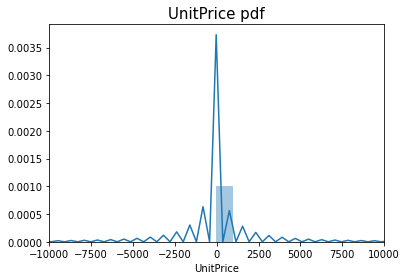

In [27]:
sns.distplot(cust_seg_df['UnitPrice'])
plt.title('UnitPrice pdf', size=15)
plt.xlim(-10000, 10000)
plt.show()

### Top 10 countries in terms of number of orders

In [10]:
cust_seg_df['Country'].value_counts().head(10)

United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         2002
Portugal            1519
Australia           1259
Name: Country, dtype: int64

In [34]:
np.mean(cust_seg_df['Country'] ==  'United Kingdom') * 100

91.43195628786383

91% of orders are in home-country (UK)

### Countries in business 

In [11]:
countires = cust_seg_df['Country'].unique()
print("Total Countries: " + str(len(countires)))
print(countires)

Total Countries: 38
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


### Number of Unique Customers

In [12]:
cust_seg_df["CustomerID"].unique().shape[0]

4373

### Top 10 Customers w.r.t number of orders

In [29]:
cust_seg_df['CustomerID'].value_counts().reset_index().head(10)

,index,CustomerID
0,17841.0,7983
1,14911.0,5903
2,14096.0,5128
3,12748.0,4642
4,14606.0,2782
5,15311.0,2491
6,14646.0,2085
7,13089.0,1857
8,13263.0,1677
9,14298.0,1640


### What percentage of overall orders top customers contribute? 

In [14]:
(cust_seg_df['CustomerID'].value_counts() / sum(cust_seg_df['CustomerID'].value_counts())  * 100 ).reset_index().head(10)

,index,CustomerID
0,17841.0,1.962249
1,14911.0,1.450978
2,14096.0,1.260480
3,12748.0,1.141020
4,14606.0,0.683825
5,15311.0,0.612297
6,14646.0,0.512500
7,13089.0,0.456457
8,13263.0,0.412213
9,14298.0,0.403118


### What is the combined percantage to top 10 customers (cummulative sum)?

In [15]:
(cust_seg_df['CustomerID'].value_counts() / sum(cust_seg_df['CustomerID'].value_counts())  * 100 ).reset_index().head(10).cumsum()

,index,CustomerID
0,17841.0,1.962249
1,32752.0,3.413228
2,46848.0,4.673708
3,59596.0,5.814728
4,74202.0,6.498553
5,89513.0,7.110850
6,104159.0,7.623350
7,117248.0,8.079807
8,130511.0,8.492020
9,144809.0,8.895138


Thats 9% of overall orders in contributed by top 10 customers out of 4373 customers.

### Unique number of items

In [16]:
cust_seg_df['StockCode'].unique().shape[0]

4070

In [17]:
cust_seg_df['Description'].unique().shape[0]

4224

There a mismatch between number of products and description. Indicates that there are mutliple descritions for some
products.

### Filtering duplicate descritions - Data Quality Issue

In [30]:
prod_des_df = cust_seg_df.groupby(['StockCode','Description']).count().reset_index()
duplicate_des_df = prod_des_df['StockCode'].value_counts()\
[prod_des_df['StockCode'].value_counts() > 1].reset_index()
duplicate_des_df.head()

,index,StockCode
0,20713,8
1,23084,7
2,21830,6
3,85175,6
4,23343,5


Example of a product with duplicate descripton

In [19]:
cust_seg_df[cust_seg_df['StockCode'] == 20713 ]\
['Description'].unique()

array(['JUMBO BAG OWLS', nan, 'wrongly marked. 23343 in box',
       'wrongly coded-23343', 'found', 'Found', 'wrongly marked 23343',
       'Marked as 23343', 'wrongly coded 23343'], dtype=object)

It should be reported. However, this missmatch would not effect our analysis.

### Save data
Loading csv is faster as compared to xlx.

In [23]:
cust_seg_df.to_csv(os.path.join(RAW_DATA_DIR, "Online Retail.csv"), index=False)

------